# 빅데이터 사이언스 양성과정 실무 프로젝트 
### 2019. 10. 11(금) 10:00 ~ 12:00

### Content
- 데이터 살펴보기
    - 캐글처럼 전처리하기
    - 캐글처럼 피쳐 만들기
- 검증과 모델링
    - 캐글처럼 모델 검증하기
    - 캐글처럼 앙상블하기
    
---

## 캐글 코리아 1차 대회 타이타닉 생존자 예측

### File descriptions

- train.csv - 예측 모델을 만들기 위해 사용하는 학습셋입니다. 각 탑승객의 신상정보와 ground truth(생존유무)가 주어지며, 신상정보 및 파생변수를 토대로 생존유무를 예측하는 모델을 만듭니다.
- test.csv - 학습셋으로 만든 모델을 가지고 예측할 탑승객 정보가 담긴 테스트셋입니다.
- sampleSubmission.csv - 제출시 사용할 수 있는 csv 파일입니다.

### Data fields
- survival - 생존유무, target 값. (0 = 사망, 1 = 생존)
- pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
- sex - 성별
- Age - 나이(세)
- sibsp - 함께 탑승한 형제자매, 배우자 수 총합
- parch - 함께 탑승한 부모, 자녀 수 총합
- ticket - 티켓 넘버
- fare - 탑승 요금
- cabin - 객실 넘버
- embarked - 탑승 항구

### 1. 데이터 살펴보기

In [35]:
from os.path import join
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

train_path = join('input', 't_train.csv')
test_path  = join('input', 't_test.csv')

In [36]:
train = pd.read_csv(train_path)
test  = pd.read_csv(test_path)

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 1.1 캐글처럼 전처리하기

#### 결측치와 이상치 확인하기
정형 데이터에서 결측치와 이상치는 모델에 안좋은 영향을 끼칠 수 있습니다. <br>
따라서 반드시 결측치와 이상치의 유무를 확인 하시고, 다음 단계로 진행하시는 것이 좋습니다.<br><br>

#### 결측치 확인하기
Missingno 라이브러리는 결측치를 시각화하여 한눈에 확인할 수 있는 라이브러리입니다. 주로 정형 데이터에서는 matrix 함수로 살펴봅니다.

In [9]:
# !pip install missingno

In [10]:
import missingno as msno

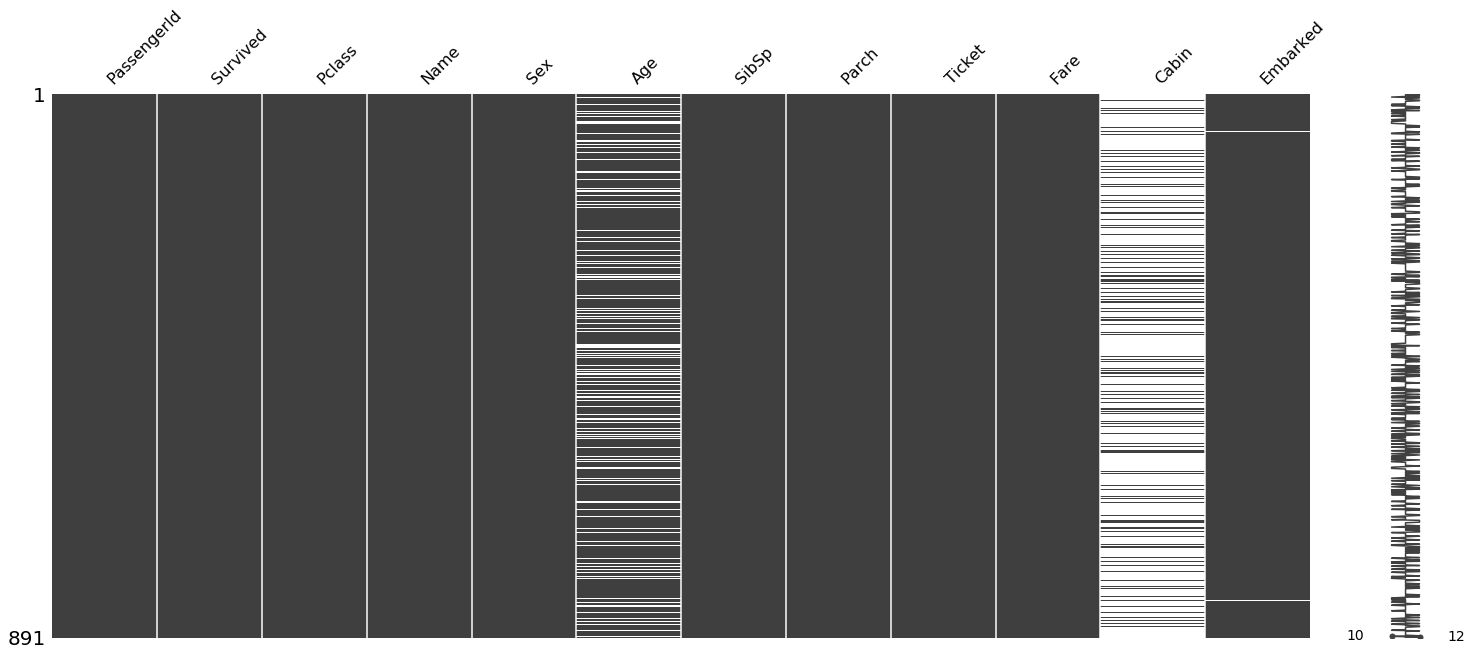

In [11]:
msno.matrix(train)

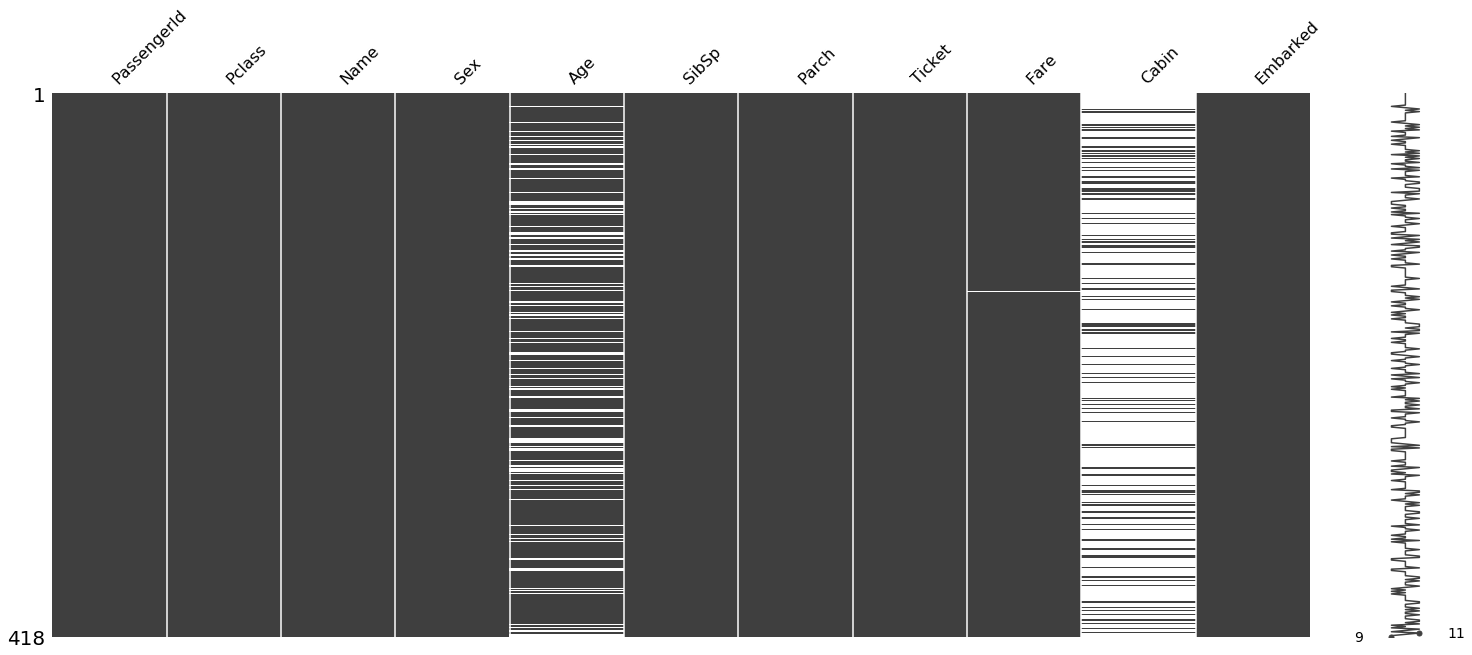

In [12]:
msno.matrix(test)

In [38]:
del_cols = ['Cabin']

for c in del_cols:
    del train[c]
    del test[c]

In [39]:
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [15]:
train.Age.head(6)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
Name: Age, dtype: float64

In [40]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [41]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

#### 1) 수치형 변수
일반적으로 수치형 변수의 분포가 정규분포(종모양)에 가까울수록 모델이 데이터를 학습하기 쉽습니다. 실제 데이터의 분포가 한쪽으로 치우친 경우 분포의 형태를 조절 합니다.<br>
수치형 변수들의 분포를 시각화 하여, 조정이 필요한 변수를 확인해보겠습니다.

#### 2) 범주형 변수

##### (1) Label Encoding
라벨 인코딩은 n개의 범주형 데이터를 0~n-1 의 연속적인 수치 데이터로 표현합니다.<br>
예를 들어, 차의 등급 변수를 라벨 인코딩으로 변환하면 다음과 같이 표현할 수 있습니다.<br><br>
차의 등급 : [소형, 중형, 대형]<br>
소형 : 0 <br>
중형 : 1 <br>
대형 : 2 <br>
라벨 인코딩은 간단한 방법이지만, '소형'과 '중형'이라는 범주형 데이터가 가지고 있는 차이가 0과 1의 수치적인 차이라는 의미가 아님을 주의하셔야 합니다.

##### (2) One-hot Encoding
원핫 인코딩은 n개의 범주형 데이터를 n개의 비트(0,1) 벡터로 표현합니다. <br>
예를 들어, 위에서 언급한 소형, 중형, 대형으로 이루어진 범주형 변수를 원핫 인코딩을 통해 변환하면 다음과 같이 표현할 수 있습니다.<br>
소형 : [1, 0, 0] <br>
중형 : [0, 1, 0] <br>
대형 : [0, 0, 1] <br>
원핫 인코딩으로 범주형 데이터를 나타내게되면, 서로 다른 범주에 대해서는 벡터 내적을 취했을 때 내적 값이 0이 나오게 됩니다. <br> 
이를 통해 서로 다른 범주 데이터는 벡터 공간에서 독립적인 관계라는 것을 표현할 수 있게 됩니다.

이번 수업에서는 Pandas에서 기본적으로 지원하는 One-hot Encoding만 살펴보겠습니다.

Pandas의 함수인 get_dummies 함수를 사용하면 자동적으로 모든 범주형 변수(Object, 자료형)에 대해 Ont-hot Encoding을 수행합니다.

- 데이터 전처리 <br>

- 캐글 코리아 1차대회 커널 자료 : https://www.kaggle.com/karell/kakr-1st-titanic-gender-model-with-blending

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
test = pd.get_dummies(test)

In [33]:
### Age 결측치 처리

In [43]:
train['Initial']= train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
test['Initial']= test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [44]:
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [46]:
groupby_Age = train.groupby('Initial').mean()['Age']

In [51]:
list(groupby_Age.index)

['Master', 'Miss', 'Mr', 'Mrs', 'Other']

In [54]:
groupby_Age

Initial
Master     7.086662
Miss      23.377249
Mr        32.049894
Mrs       35.140827
Other     45.888889
Name: Age, dtype: float64

In [52]:
for init in list(groupby_Age.index):
    train.loc[(train.Age.isnull())&(train.Initial==init),'Age'] = groupby_Age[init]
    test.loc[(train.Age.isnull())&(test.Initial==init),'Age'] = groupby_Age[init]

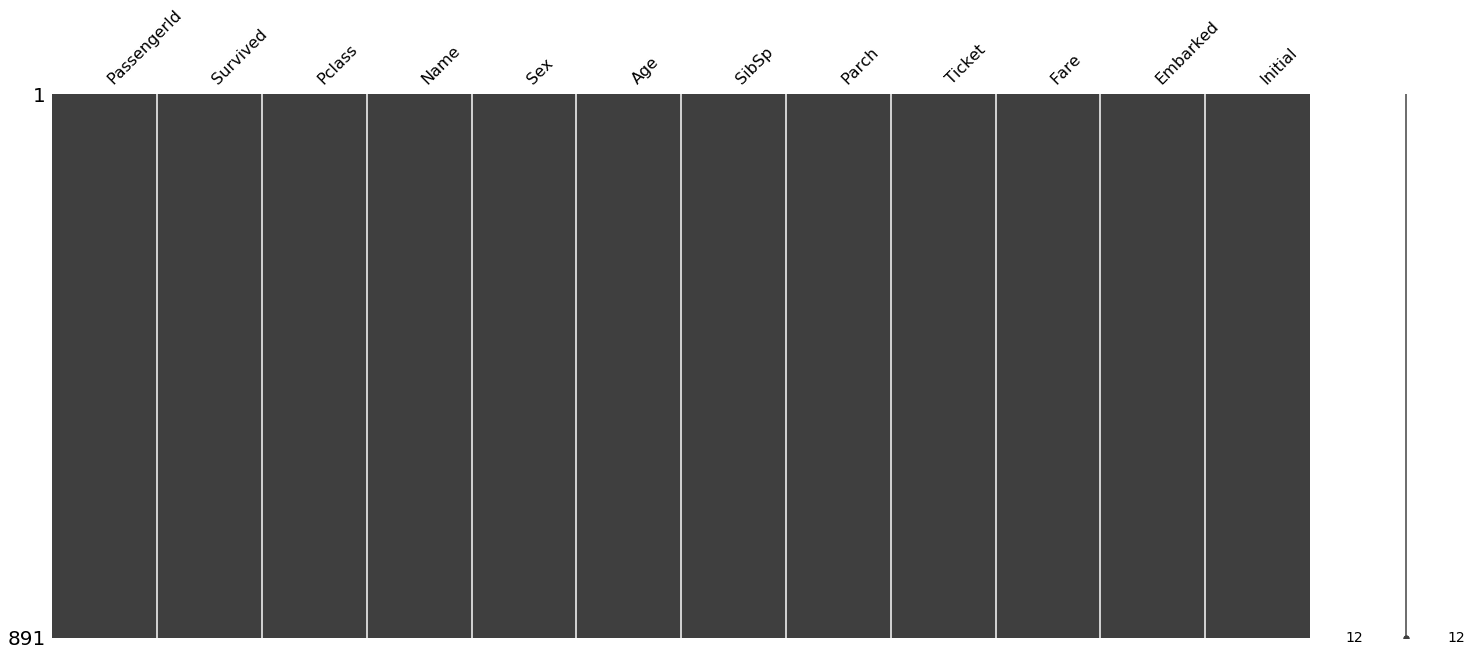

In [53]:
msno.matrix(train)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Initial'],
      dtype='object')


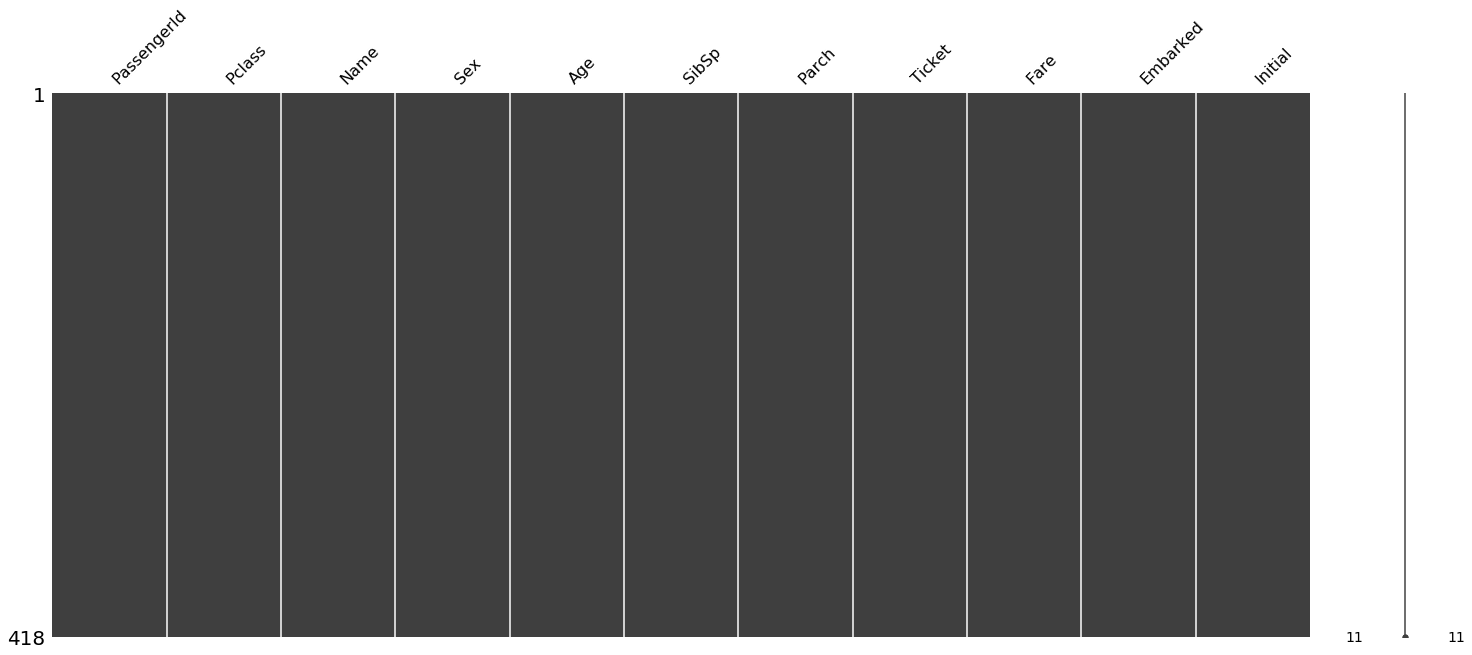

In [56]:
print(test.columns)
msno.matrix(test)

In [57]:
del_cols = ['PassengerId', 'Name', 'Ticket']

for c in del_cols:
    del train[c]
    del test[c]

In [58]:
y_train = train['Survived']
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [60]:
del train['Survived']
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,3,male,22.0,1,0,7.2500,S,Mr
1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,female,26.0,0,0,7.9250,S,Miss
3,1,female,35.0,1,0,53.1000,S,Mrs
4,3,male,35.0,0,0,8.0500,S,Mr


In [59]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train, y_train)

In [61]:
x_train = pd.get_dummies(x_train)
x_val = pd.get_dummies(x_val)

In [62]:
test = pd.get_dummies(test)

In [64]:
x_train.isnull().sum()

Survived          0
Pclass            0
Age               0
SibSp             0
Parch             0
Fare              0
Sex_female        0
Sex_male          0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Initial_Master    0
Initial_Miss      0
Initial_Mr        0
Initial_Mrs       0
Initial_Other     0
dtype: int64

### 1.2 캐글처럼 피쳐 만들기

### 2. 검증과 모델링

### 데이터 나누기
#### 1) Train, Validation, Test
훈련, 검증, 테스트 데이터라고 부르는 3가지를 한번 이야기 해보겠습니다.<br>
* Train Data : 모델을 학습하는데 사용하는 데이터 (모델이 알고 있는 학습할 데이터)
* Valid Data : 학습한 모델의 성능을 검증하는 데이터 (모델이 모르는 학습하지 않을 데이터, 모델 검증에 사용하는 데이터)
* Test Data : 학습한 모델로 예측할 데이터 (모델이 모르는 예측할 데이터)

<img src='./img/train_val_test.png' style='height : 500px' >

#### Why Train & Validation data?
왜 훈련 데이터와 검증 데이터가 필요할까요? 훈련 데이터는 모델을 학습하는데 사용하는 데이터라는건 알겠는데....<br>
검증 데이터는 무엇을 검증하려는 걸까요? 

훈련 데이터로 학습한 모델은 훈련 데이터에 대해서는 성능이 좋겠지만, 관찰하지 않은 데이터(Unseen)에 대해서는 성능이 좋을지 장담할 수 없습니다.<br>
그래서 훈련 데이터로 학습한 모델이 실제로 예측하기를 원하는 데이터(Test)에서 좋은 결과를 낼 수 있을지 검증하는 단계가 필요합니다.<br>
이 때 사용되는 데이터가 검증 데이터입니다. 

### 2.1 캐글처럼 모델 검증하기

#### 1) 모델 검증 프로세스, Cross Validation
#### k-fold
k-fold는 데이터를 k개로 쪼개는 것을 말합니다. <br>
일반적으로 Cross Validation에서 사용되며, 데이터셋을 k개로 쪼개어 k-1개로 모델을 학습하고, 1개로 모델을 검증합니다. <br>
k개로 데이터를 쪼개면, 모든 fold에 대해(하나의 fold를 선택하여) 검증하는 방식으로 k번 다른 데이터셋으로 학습한 모델을 검증할 수 있습니다.

![kfold](./img/kfold.png)

##### k-fold
![kfold_example](./img/kfold_example.png)

#### k-Fold
k-fold는 말 그대로 데이터를 k개로 쪼갭니다. <br>
k의 개수를 조절하여 몇개의 fold를 만들지 결정할 수 있습니다.

k-fold는 sklearn의 model_selection 패키지에 있습니다.

In [65]:
from sklearn.model_selection import KFold

In [66]:
kf = KFold(n_splits=5, shuffle=True, random_state=2019)

In [ ]:
kf.split(x_train, y_train)

### 2.2 캐글처럼 앙상블하기

### 3. 결과 만들기

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier(max_depth=6
                           ,random_state=2019)

In [26]:
rf.fit(train, y_train)

C:\Python\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2019,
                       verbose=0, warm_start=False)

In [27]:
y_pred = rf.predict(test)

In [28]:
sub_path = join('input', 't_sample_submission.csv')
sub = pd.read_csv(sub_path)

In [29]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [30]:
sub['Survived'] = y_pred

In [31]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [32]:
sub.to_csv('submit.csv', index=False)

### Reference
- Validation 데이터가 필요한 이유 : https://3months.tistory.com/118
- Sklearn, KFold : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
- Sklearn, Compare with KFold : https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py
- Sklearn, Cross Validation Score : https://www.google.com/url?q=http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html&sa=U&ved=0ahUKEwiGxeHhqubhAhUKV7wKHbFhDrcQFggEMAA&client=internal-uds-cse&cx=016639176250731907682:tjtqbvtvij0&usg=AOvVaw0rIHEJ1ltDaghFv1bvPeRO